In [105]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("Mall_Customers.csv")

print(df.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [106]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop(['CustomerID', 'Gender','Age'], axis=1))
X = pd.DataFrame(scaled_features, columns=['Income', 'SpendingScore'])
df_scaled = pd.DataFrame(scaled_features, columns=['Income', 'SpendingScore'])

df_scaled[['CustomerID', 'Gender']] = df[['CustomerID', 'Gender']]

print(df_scaled.head())

     Income  SpendingScore  CustomerID  Gender
0 -1.738999      -0.434801           1    Male
1 -1.738999       1.195704           2    Male
2 -1.700830      -1.715913           3  Female
3 -1.700830       1.040418           4  Female
4 -1.662660      -0.395980           5  Female


<function matplotlib.pyplot.show(close=None, block=None)>

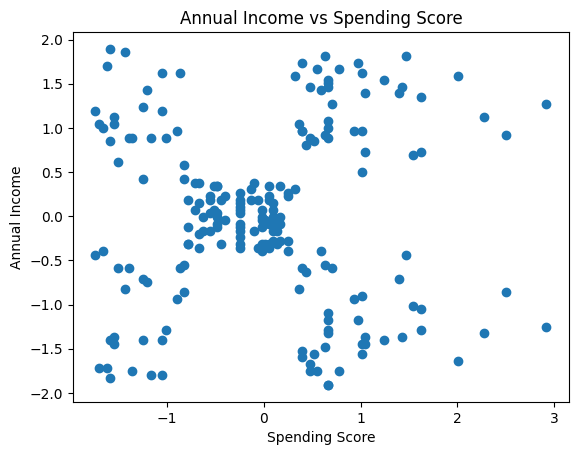

In [107]:
import matplotlib.pyplot as plt

plt.figure
plt.scatter(data=df_scaled, x='Income', y='SpendingScore')
plt.xlabel('Spending Score')
plt.ylabel('Annual Income')
plt.title('Annual Income vs Spending Score')
plt.show

In [108]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5,random_state=42)
kmeans.fit(X)

cluster_center = kmeans.cluster_centers_
print(cluster_center)

[[-0.20091257 -0.02645617]
 [ 0.99158305  1.23950275]
 [-1.32954532  1.13217788]
 [ 1.05500302 -1.28443907]
 [-1.30751869 -1.13696536]]


In [109]:
kmeans.labels_

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1])

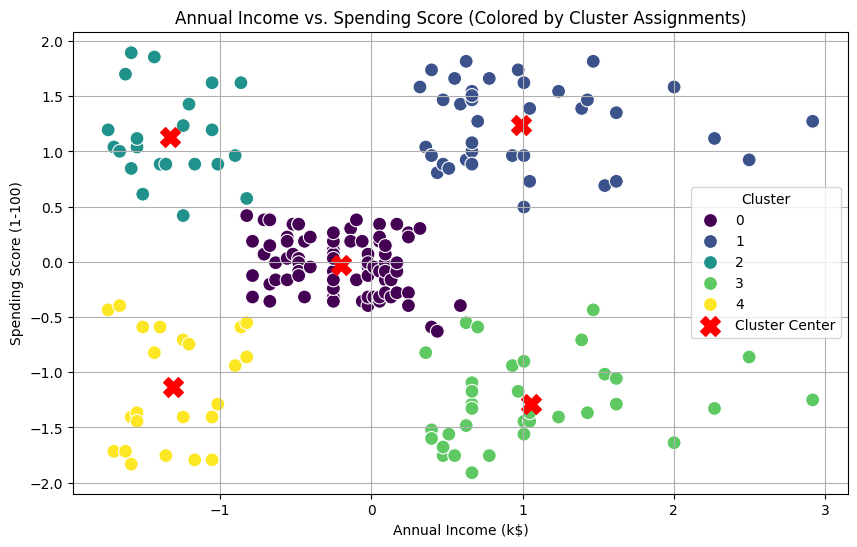

In [110]:

import seaborn as sns


df_scaled['Cluster'] = kmeans.labels_

# Plot a scatter plot of annual income vs. spending score colored by cluster assignments
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_scaled, x='Income', y='SpendingScore', hue='Cluster', palette='viridis', s=100)

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='X', s=200, c='red', label='Cluster Center')

plt.title('Annual Income vs. Spending Score (Colored by Cluster Assignments)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


In [111]:
wcss = kmeans.inertia_
print(f"WCSS (for k={k}): ", wcss)

WCSS (for k=8):  65.56840815571681


Text(0.5, 1.0, 'Cluster Elbow')

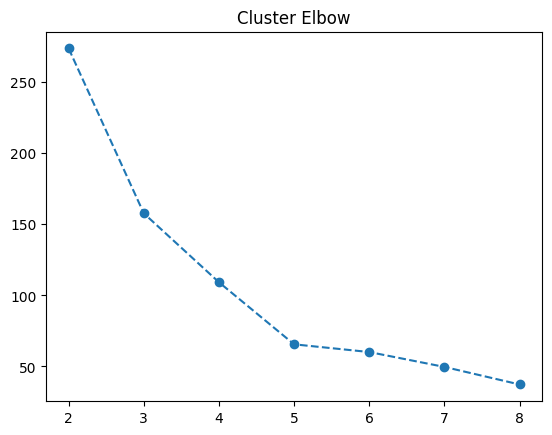

In [112]:
wcss_values = []

for k in range(2,9):
    kmeans = KMeans(n_clusters=k,random_state=42)
    kmeans.fit(X)

    wcss = kmeans.inertia_

    wcss_values.append(wcss)

plt.figure
plt.plot(range(2,9),wcss_values,marker ='o',linestyle = '--')
plt.title('Cluster Elbow')

In [113]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(X, kmeans.labels_)
print('Silhouette score : ', silhouette_avg)

Silhouette score :  0.4550112502601921
